In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import flavio

import scipy.interpolate as interp

In [4]:
obs_si = ['FL', 'AFB', 'S3', 'S4', 'S5', 'S7', 'S8', 'S9']
c9 = 1
c10 = -1

wilson_coef = flavio.WilsonCoefficients()
wilson_coef.set_initial({'C9_bsmumu' : c9, 'C10_bsmumu' : c10}, scale = 100)

In [11]:
observable_range = {}

for obs in obs_si:

    coefficient_values = {}

    for q2 in np.linspace(0,2,100):

        coefficient_values[q2] = flavio.np_prediction(f'{obs}(B0->K*mumu)', wilson_coef, q2)

    observable_range[obs] = coefficient_values

In [23]:
vals = []
qx = np.linspace(0.04,0.05,100)
for qqq in qx:
    vals.append(flavio.np_prediction(f'FL(B0->K*mumu)', wilson_coef, qqq))

Text(0.5, 0, '$q^2$')

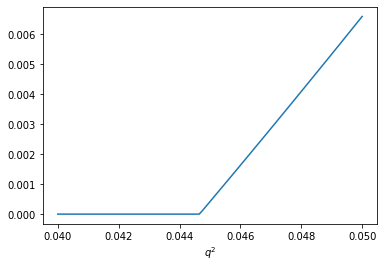

In [25]:
plt.plot(qx, vals)
plt.xlabel('$q^2$')

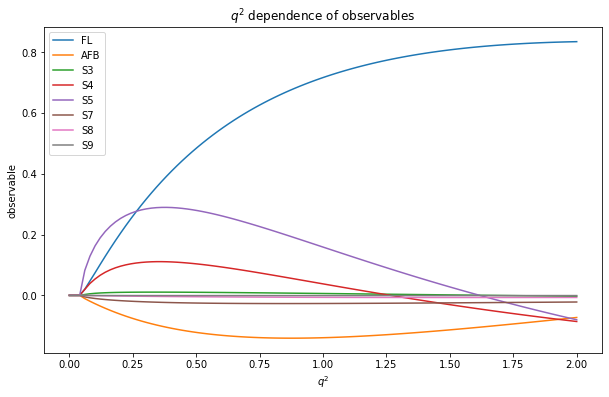

In [12]:
plt.figure(figsize=(10,6))
plt.title('$q^2$ dependence of observables')
for obs, vals in observable_range.items():
    plt.plot(vals.keys(), vals.values(), label=obs)
plt.xlabel('$q^2$')
plt.ylabel('observable')
plt.legend()

In [13]:
observable_range['FL']

{0.0: 0,
 0.020202020202020204: 0,
 0.04040404040404041: 0,
 0.06060606060606061: 0.020332395461480805,
 0.08080808080808081: 0.0474353189933745,
 0.10101010101010102: 0.07439141614468471,
 0.12121212121212122: 0.10196415044074042,
 0.14141414141414144: 0.12901777223732827,
 0.16161616161616163: 0.15536595879480244,
 0.18181818181818182: 0.18091840922658803,
 0.20202020202020204: 0.2056434157214995,
 0.22222222222222224: 0.2295974738992424,
 0.24242424242424243: 0.2527217531611774,
 0.26262626262626265: 0.27502949825079365,
 0.2828282828282829: 0.2965398196737844,
 0.30303030303030304: 0.3172814373207058,
 0.32323232323232326: 0.33730904375642035,
 0.3434343434343435: 0.356613267617053,
 0.36363636363636365: 0.37521904708902265,
 0.38383838383838387: 0.3931512043306969,
 0.4040404040404041: 0.4104392387481079,
 0.42424242424242425: 0.4271224540325994,
 0.4444444444444445: 0.44320374105135735,
 0.4646464646464647: 0.4587053417973448,
 0.48484848484848486: 0.47364873340560115,
 0.5050505

Seems as if FL, AFB, S4, and S5 vary the most with the rest being quite constant

# FL in 2D

In [ ]:
observable_range = {}
for obs in obs_si:
    coefficient_values = {}
    for q2 in np.linspace(0,2,100):
        coefficient_values[q2] = flavio.np_prediction(f'{obs}(B0->K*mumu)', wilson_coef, q2)
    observable_range[obs] = coefficient_values

## Plot

In [1]:
qq = np.linspace(0,6,300)
c9 = np.linspace(-3,3,1)
c10 = np.linspace(-3,3,1)

x, y = np.meshgrid(qq, c9)

NameError: name 'np' is not defined

In [210]:
wilson_coef = flavio.WilsonCoefficients()

z = []
c_10_const = 0
obs_const = 'S5'

for q2 in qq:
    z_row = []
    for c in c9:
        wilson_coef.set_initial({'C9_bsmumu' : c, 'C10_bsmumu' : c_10_const}, scale = 100)

        temp_val = flavio.np_prediction(f'{obs_const}(B0->K*mumu)', wilson_coef, q2)
        z_row.append(temp_val)
    
    z.append(z_row)   

z = np.array(z).T

<ipython-input-211-076dd81d9234>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


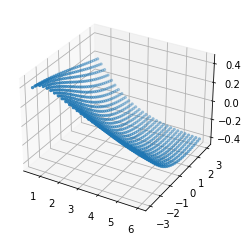

In [211]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, s=5)

fig.show()

In [284]:
def get_observable(c, q2, c_10_const=0, obs_const='S5'):
    wilson_coef.set_initial({'C9_bsmumu' : c, 'C10_bsmumu' : c_10_const}, scale = 100)

    return flavio.np_prediction(f'{obs_const}(B0->K*mumu)', wilson_coef, q2)
get_observable_vectorised = np.vectorize(get_observable, otypes=[np.float])

In [151]:
vals = []
for ccc in np.linspace(-3,3,100):
    for qqq in np.linspace(0.5,6,10):
        vals.append(get_observable(qqq, ccc))

In [303]:
qqii, ccii = np.mgrid[0.5:6:10j, -3:3:10j]
brii = get_observable_vectorised(ccii, qqii)

In [364]:
points = np.vstack([ccii.flatten(),qqii.flatten()]).T
values = get_observable_vectorised(points[:,0], points[:,1])

# xi, yi = np.mgrid[0.5:6:20j, -3:3:20j]
z_interp = interp.griddata(points, values, (y, x), method='linear')

<ipython-input-356-f5b544f9fed6>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


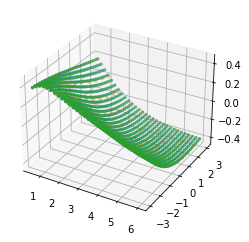

In [356]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, s=5)
ax.scatter(qqii, ccii, brii, s=5)
ax.scatter(x, y, z_interp, s=5)

fig.show()

(array([471., 330.,  46.,  13.,   8.,   8.,   6.,   6.,   6.,   6.]),
 array([0.        , 0.00246819, 0.00493639, 0.00740458, 0.00987278,
        0.01234097, 0.01480917, 0.01727736, 0.01974555, 0.02221375,
        0.02468194]),
 <BarContainer object of 10 artists>)

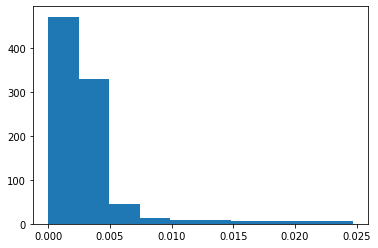

In [365]:
plt.hist(abs((z_interp - z)).flatten())

<ipython-input-209-e71ac0b079ad>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


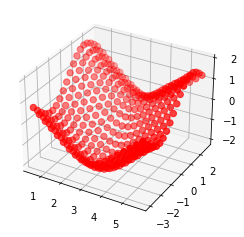

In [209]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# known points
x_known = x[::7, ::7]
y_known = y[::7, ::7]

points = np.vstack([x_known.flatten(),y_known.flatten()]).T
values = func(points[:,0], points[:,1])

xi, yi = np.mgrid[0.5:6:20j, -3:3:20j]
z_interp = interp.griddata(points, values, (xi, yi), method='cubic')

ax.scatter(xi, yi, z_interp, c='red', s=40, zorder=10)


fig.show()

## Interpolation

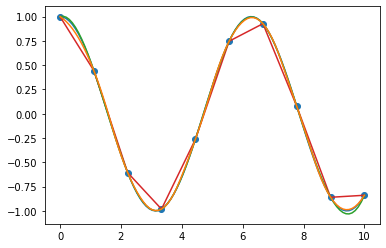

In [139]:
x_true = np.linspace(0,10,100)
y_true = np.cos(x_true)

x_sparse = np.linspace(0, 10, 10)
y_sparse = np.cos(x_sparse)

plt.plot(x_true, y_true)
plt.scatter(x_sparse, y_sparse)

f = interp.interp1d(x_sparse, y_sparse)
f2 = interp.interp1d(x_sparse, y_sparse, kind='cubic')
f3 = interp.interp1d(x_sparse, y_sparse, kind='quadratic')

plt.plot(x_true, f(x_true), c='tab:red')
plt.plot(x_true, f2(x_true), c='tab:green')
plt.plot(x_true, f3(x_true), c='tab:orange')


<ipython-input-99-cf04b18ea1a4>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


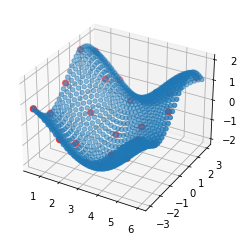

In [99]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

zzz = np.array(list(map(lambda x1, x2: np.cos(x1) + np.sin(x2), x, y)))

ax.scatter(x, y, zzz, zorder=0)

# known points
x_known = x[::7, ::7]
y_known = y[::7, ::7]
z_known = np.array(list(map(lambda x1, x2: np.cos(x1) + np.sin(x2), x_known, y_known)))

ax.scatter(x_known, y_known, z_known, c='red', s=40, zorder=10)

fig.show()

<ipython-input-134-69c74d7a2cb2>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


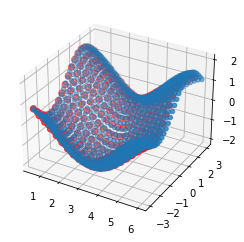

In [134]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

zzz = np.array(list(map(lambda x1, x2: np.cos(x1) + np.sin(x2), x, y)))

ax.scatter(x, y, zzz, zorder=0)

# known points
x_known = x[::7, ::7]
y_known = y[::7, ::7]
z_known = np.array(list(map(lambda x1, x2: np.cos(x1) + np.sin(x2), x_known, y_known)))

points = np.vstack([x_known.flatten(),y_known.flatten()]).T
values = func(points[:,0], points[:,1])

xi, yi = np.mgrid[0.5:6:20j, -3:3:20j]
z_interp = interp.griddata(points, values, (xi, yi), method='cubic')

ax.scatter(xi, yi, z_interp, c='red', s=40, zorder=10)


fig.show()

In [127]:
xi

array([[0.5]])

# 3D interpolation 

In [457]:
def f(x,y,z):
    return x + y * z

In [458]:
x_lin = np.linspace(0,10,10)
y_lin = np.linspace(10,20,10)
z_lin = np.linspace(20,30,10)

X, Y, Z = np.meshgrid(x_lin, y_lin, z_lin)
X_m, Y_m, Z_m = np.mgrid[0:10:10j, 10:20:10j, 20:30:10j]

values = f(X, Y, Z)
values_m = f(X_m, Y_m, Z_m)

In [465]:
# interpolation
values_interp = interp.interpn(
    [x_lin, y_lin, z_lin],
    values, 
    (X, Y, Z),
    method='linear'
)

values_interp_m = interp.interpn(
    [x_lin, y_lin, z_lin],
    values_m, 
    (X_m, Y_m, Z_m),
    method='linear'
)

<ipython-input-470-bb136e1a95f9>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


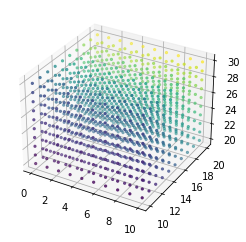

In [470]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# ax.scatter(X, Y, Z, c=values, s=5)
# ax.scatter(X, Y, Z, c=values_interp, s=5)

ax.scatter(X_m, Y_m, Z_m, c=values_m, s=5)
# ax.scatter(X_m, Y_m, Z_m, c=values_interp_m, s=5)

fig.show()

In [475]:
values_m - values_interp_m

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]